<h1><center>Analysis of Wine Reviews</center></h1>
<h3><center>By: Golpira Elmi Assadzadeh, Ph.D.</center></h3>

## Introduction

A sommelier is a highly skilled wine professional having broad knowledge of wine service and food-wine pairing. While, computers cannot mimic human senses, this project aims to identify wines based on wine descriptions provided by people, similar to what a sommelier does. The dataset used here contains approximately 130000 wine reviews and 13 wine features including country of origin, price, variety, winery, taster name, and assigned points representing wine quality. This dataset is available online for public download at https://www.kaggle.com/zynicide/wine-reviews.


Analyzing unstructured text data is especially important for sentiment analysis, spam filtering, recommendation systems, and translation. As computer models can only accept numerical values, any text data analysis requires several preliminary steps to convert flowing text into numerical values. This process is called feature engineering.

## Data Analysis
### Downloading Data

In [3]:
import pandas as pd
from io import BytesIO
from zipfile import ZipFile
import requests
import matplotlib.pyplot as plt

#Unzipping the folder

url = 'https://github.com/golpiraelmi/Wine-reviews/blob/master/1442_8172_compressed_winemag-data-130k-v2.csv%20(1).zip?raw=true'

content = requests.get(url)
zf = ZipFile(BytesIO(content.content))

for item in zf.namelist():
    print("File in zip: "+  item)

# Finding the first matching csv file in the zip:
match = [s for s in zf.namelist() if ".csv" in s][0]

# The first line of the file contains a string - that line shall be ignored, hence skiprows
# The column names are defined
reviews = pd.read_csv(zf.open(match), low_memory=False, skiprows=[0], 
                      names=['Country','Description', 'Designation','Points', 
                            'Price','Province','Region_1', 'Region_2','Taster_Name',
                            'Taster_Twitter_Handle','Title','Variety','Winery'])

File in zip: winemag-data-130k-v2.csv


Taking a look at the first few rows, and getting information bout the dataset:

In [4]:
reviews.head()

,Country,Description,Designation,Points,Price,Province,Region_1,Region_2,Taster_Name,Taster_Twitter_Handle,Title,Variety,Winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
print('Number of rows: ', reviews.shape[0])

Number of rows:  129971


In [6]:
print('Number of columns: ', reviews.shape[1])

Number of columns:  13


In [7]:
print('Column Names: \n')
for i in reviews.columns:
    print (i)

Column Names: 

Country
Description
Designation
Points
Price
Province
Region_1
Region_2
Taster_Name
Taster_Twitter_Handle
Title
Variety
Winery


### Number of wine tasters
There are 19 individual wine tasters in the dataset. 

In [9]:
reviews['Taster_Name'].nunique()

19

### Identifying the number of missing values

In [10]:
missing_cols = reviews.isnull().sum()
missing_cols = missing_cols[missing_cols > 0].index

temp = pd.DataFrame(reviews[missing_cols].isnull().sum()).reset_index()
temp.columns = ["Column Name", "Number of Missing Values"]

temp

,Column Name,Number of Missing Values
0,Country,63
1,Designation,37465
2,Price,8996
3,Province,63
4,Region_1,21247
5,Region_2,79460
6,Taster_Name,26244
7,Taster_Twitter_Handle,31213
8,Variety,1


### Checking for duplicate entries

In [11]:
print("Number of rows with the similar title and description: ", reviews[reviews.duplicated(['Description','Title'])].shape[0])

Number of rows with the similar title and description:  9983


### Removing duplicate entries

In [12]:
reviews=reviews.drop_duplicates(['Description','Title'])
reviews=reviews.reset_index(drop=True)

### Descriptive statistics on numerical columns

In [13]:
round(reviews.describe(),2)

,Points,Price
count,119988.00,111593.00
mean,88.44,35.62
std,3.09,42.10
min,80.00,4.00
25%,86.00,17.00
50%,88.00,25.00
75%,91.00,42.00
max,100.00,3300.00


### Distribution plot of wine points

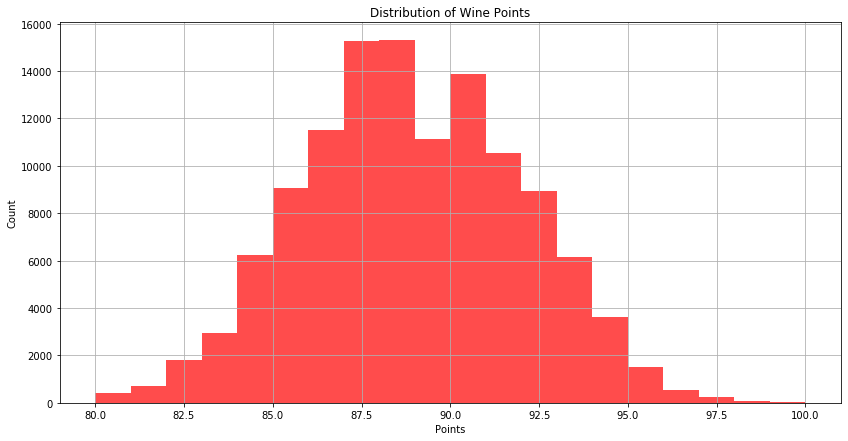

In [14]:
fig, ax = plt.subplots(figsize=(14, 7))
reviews.Points.hist(bins=20, color='r', alpha=0.7)
plt.title("Distribution of Wine Points")
plt.ylabel("Count")
plt.xlabel('Points')
plt.show()

### Average of wine points

Wine points are normally distributed with average of 88.4.

In [66]:
'{:.1f}'.format(reviews.Points.mean())

'88.4'

### Distribution of wine prices
The plot below shows wine price distribution. There are some very expensive wines in this dataset!

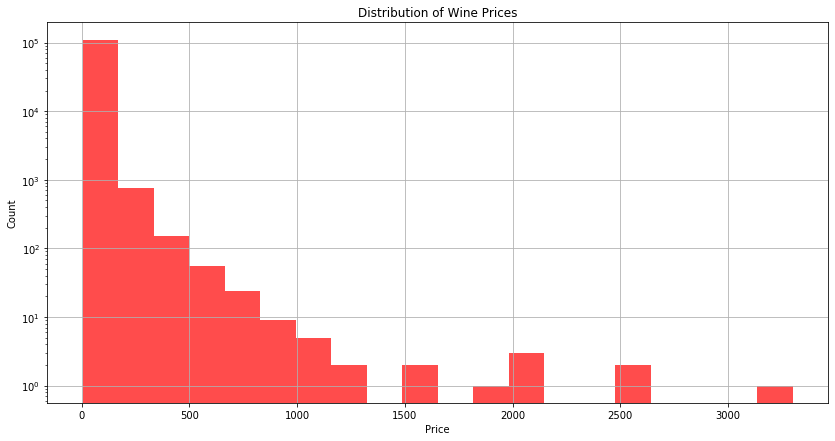

In [16]:
fig, ax = plt.subplots(figsize=(14, 7))
reviews.Price.hist(bins=20, color='r', alpha=0.7)
plt.title("Distribution of Wine Prices")
plt.ylabel("Count")
plt.xlabel('Price')
plt.yscale('log')
plt.show()

### How does wine quality correlate with wine price?

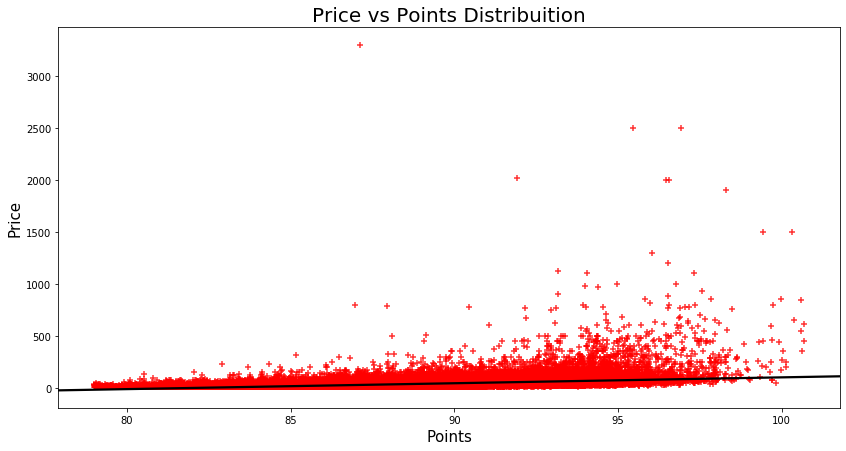

In [63]:
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")

fig, ax = plt.subplots(figsize=(14, 7))
g = sns.regplot(x='Points', y='Price', marker='+',
                data=reviews, line_kws={'color':'black'},
                x_jitter=True, color='red')
g.set_title("Price vs Points Distribuition", fontsize=20)
g.set_xlabel("Points", fontsize= 15)
g.set_ylabel("Price", fontsize= 15)

plt.show()

The plot above shows that on average, better quality wines are more expensive than less quality wines with some wines being much more expensive than the rest. It is prudent to investigate why some wines with similar quality are priced much higher than average.

In [18]:
# Calculating correlation 
print('{:.2f}'.format(reviews['Points'].corr(reviews['Price'])))

0.42


### Wine reviews per country
The codes below calculate and plot the top 10 countries with most reviews.
The United States has highest number of reviews followed by Italy, France, and Spain.

In [19]:
country = reviews.Country.value_counts().head(10)
country

US           50457
France       20353
Italy        17940
Spain         6116
Portugal      5256
Chile         4184
Argentina     3544
Austria       3034
Australia     2197
Germany       1992
Name: Country, dtype: int64

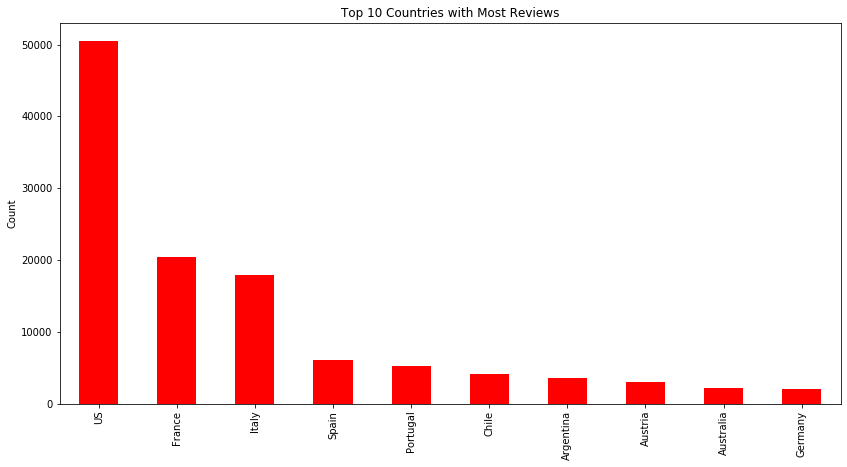

In [20]:
fig, ax = plt.subplots(figsize=(14, 7))
country.plot(kind='bar', ax=ax, title="Top 10 Countries with Most Reviews", color='r')
plt.ylabel('Count')
plt.show()

### Average points and the frequency of ratings for countires with most reviews

In [61]:
temp_country = pd.DataFrame(reviews.groupby('Country')['Points'].agg(Average_Point='mean', Number_of_Reviews ='count')).reset_index()
temp_country = temp_country.sort_values(by='Number_of_Reviews', ascending=False).head(20)
temp_country

,Country,Average_Point,Number_of_Reviews
40,US,88.555384,50457
15,France,88.866752,20353
22,Italy,88.576198,17940
37,Spain,87.235612,6116
31,Portugal,88.263128,5256
8,Chile,86.460564,4184
0,Argentina,86.649831,3544
3,Austria,90.129532,3034
2,Australia,88.561220,2197
17,Germany,89.895582,1992


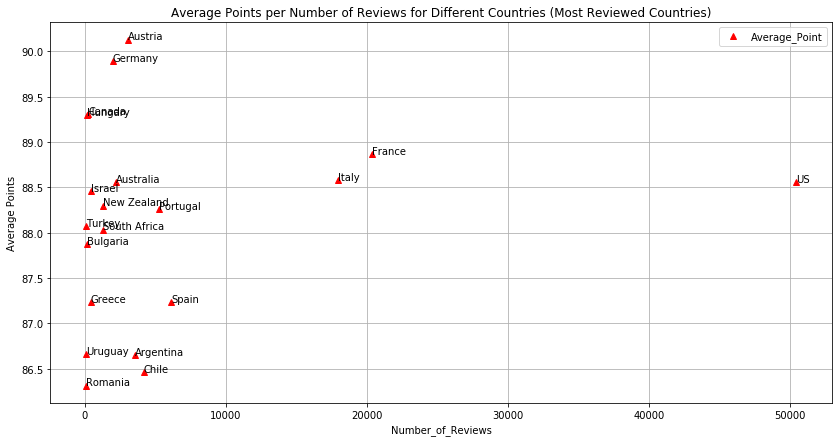

In [62]:
fig, ax = plt.subplots(figsize=(14, 7))
plt.title('Average Points per Number of Reviews for Different Countries (Most Reviewed Countries)')
plt.ylabel('Average Points')
temp_country.plot(x='Number_of_Reviews', y='Average_Point', grid=True, ax=ax, style='r^')

temp_country[['Number_of_Reviews','Average_Point','Country']].apply(lambda row: ax.text(*row, size=10),axis=1)

plt.show()

### Average points and the frequency of ratings for Region_1 with most reviews

In [23]:
temp_region_1 = pd.DataFrame(reviews.groupby('Region_1')['Points'].agg(Average_Point='mean', Number_of_Reviews ='count')).reset_index()
temp_region_1 = temp_region_1.sort_values(by='Number_of_Reviews', ascending=False).head(30)

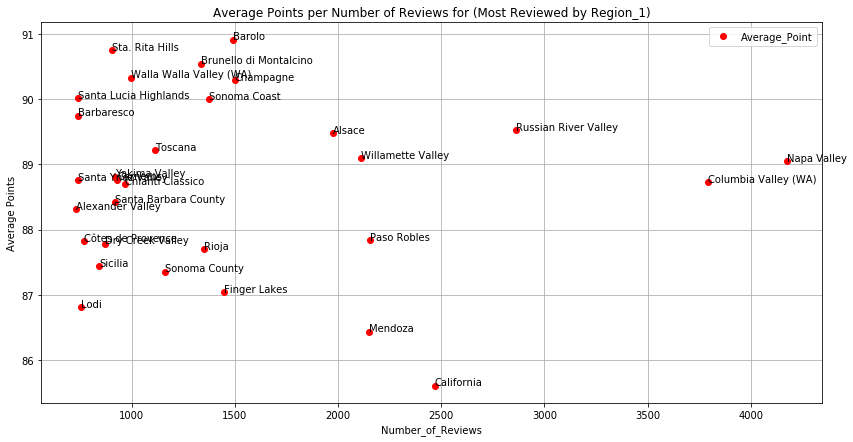

In [24]:
fig, ax = plt.subplots(figsize=(14, 7))
temp_region_1.plot(x='Number_of_Reviews', y='Average_Point', grid=True, ax=ax, style= 'ro')
plt.title('Average Points per Number of Reviews for (Most Reviewed by Region_1)')
plt.ylabel('Average Points')

temp_region_1[['Number_of_Reviews','Average_Point','Region_1']].apply(lambda row: ax.text(*row, size=10),axis=1)

plt.show()

### Average points and the frequency of ratings for Region_2 with most reviews

In [25]:
temp_region_2 = pd.DataFrame(reviews.groupby('Region_2')['Points'].agg(Average_Point='mean', Number_of_Reviews ='count')).reset_index()
temp_region_2 = temp_region_2.sort_values(by='Number_of_Reviews', ascending=False)


temp_region_2.head(5)

,Region_2,Average_Point,Number_of_Reviews
1,Central Coast,88.818333,10233
12,Sonoma,88.928725,8390
3,Columbia Valley,89.015269,7466
6,Napa,89.423300,6369
16,Willamette Valley,89.481859,3142


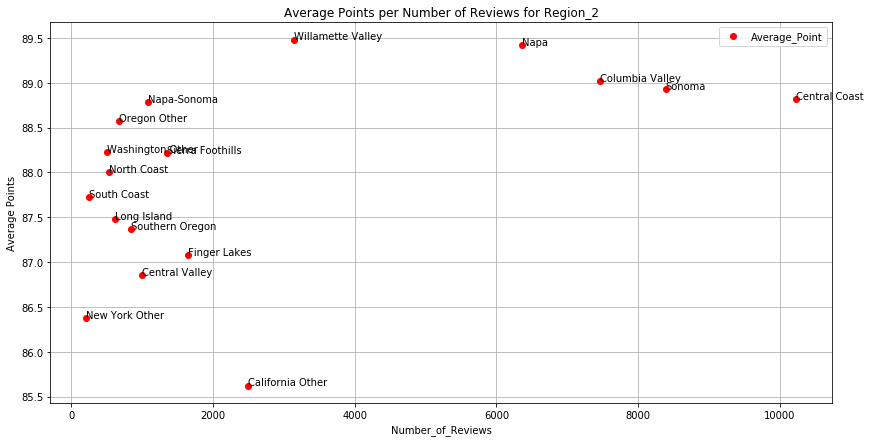

In [26]:
fig, ax = plt.subplots(figsize=(14, 7))
temp_region_2.plot(x='Number_of_Reviews', y='Average_Point', grid=True, ax=ax, style= 'ro')
plt.title('Average Points per Number of Reviews for Region_2')
plt.ylabel('Average Points')

temp_region_2[['Number_of_Reviews','Average_Point','Region_2']].apply(lambda row: ax.text(*row, size=10, horizontalalignment='left'),axis=1)

plt.show()

### Boxplot of wine prices for countries with most number of ratings

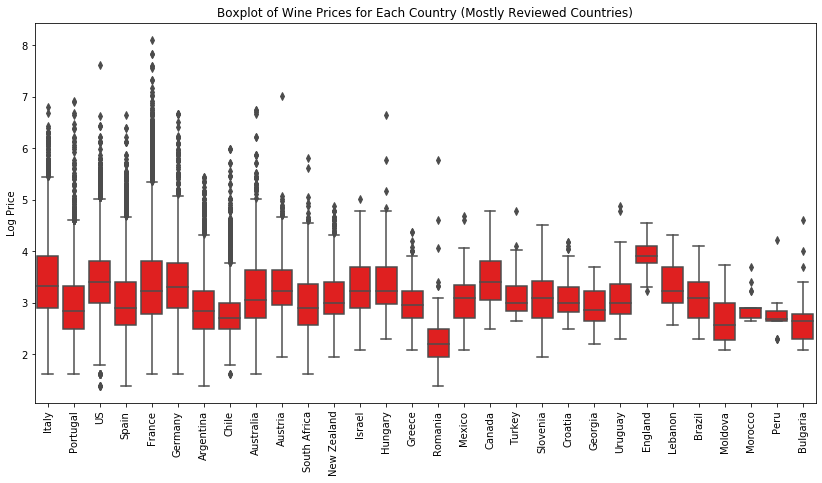

In [27]:
import numpy as np
fig, ax = plt.subplots(figsize=(14, 7))

# Creating a log of price for better visualization 
reviews['Log Price'] = np.log(reviews['Price'])

# Creating a list of countries with most number of ratings
country=temp_country.Country

# If the reviews.Country is in country (with most wine review), then create the boxplot
sns.boxplot(x='Country', y='Log Price',
                 data=reviews.loc[(reviews.Country.isin(country))], 
                 color='red')

plt.title('Boxplot of Wine Prices for Each Country (Mostly Reviewed Countries)')
plt.ylabel('Log Price')
plt.xlabel('')
plt.xticks(rotation=90)
plt.show()

### Boxplot of wine points for countries with most number of ratings

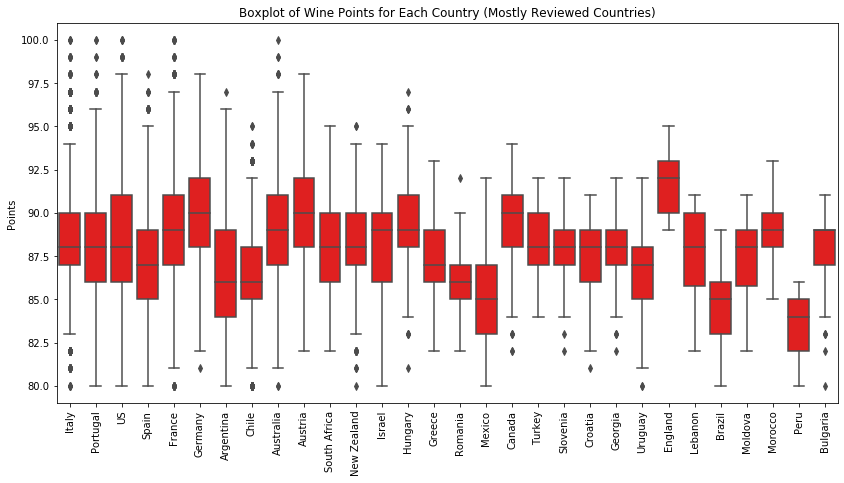

In [60]:
fig, ax = plt.subplots(figsize=(14, 7))

# If the reviews.Country is in country (with most wine review), then create the boxplot
sns.boxplot(x='Country', y='Points',
                 data=reviews.loc[(reviews.Country.isin(country))],
                 color='red')

plt.title('Boxplot of Wine Points for Each Country (Mostly Reviewed Countries)')
plt.xlabel('')
plt.ylabel('Points')
plt.xticks(rotation=90)
plt.show()

# Sentiment Analysis
Sentiment analysis is used to interpret and classify emotions based on customer reviews. With generation of huge unstructured data on the web from various sources such as social media, emails, chats, and product reviews, it is important to analyze and understand these data using computers, which is less expensive, and faster compared to humans.

"Sentiment Intensity Analyzer" is used to assign a sentiment intensity score to wine reviews. The Compound score uses lexicon ratings that are normalized between -1 (most extreme negative) and +1 (most extreme positive).

In [29]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer()

In [30]:
# Taking a random 50% sample of database
sentiment = reviews.sample(frac=0.5, replace=True, random_state=1)

In [31]:
sentiment['polarity_score']=sentiment.Description.apply(lambda x:SIA.polarity_scores(x)['compound'])
sentiment['neutral_score']=sentiment.Description.apply(lambda x:SIA.polarity_scores(x)['neu'])
sentiment['negative_score']=sentiment.Description.apply(lambda x:SIA.polarity_scores(x)['neg'])
sentiment['positive_score']=sentiment.Description.apply(lambda x:SIA.polarity_scores(x)['pos'])

In [32]:
sentiment.shape

(59994, 18)

In [33]:
sentiment['sentiment']= np.nan
sentiment.loc[sentiment.polarity_score>0,'sentiment']='Positive'
sentiment.loc[sentiment.polarity_score==0,'sentiment']='Neutral'
sentiment.loc[sentiment.polarity_score<0,'sentiment']='Negative'

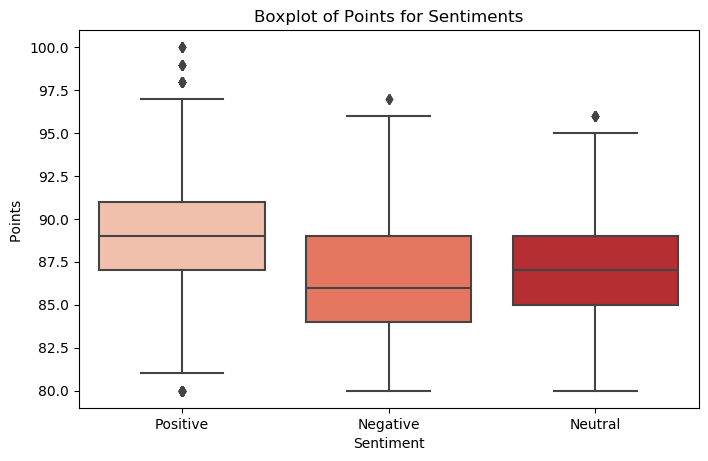

In [59]:
plt.figure(figsize=(8,5), dpi=100)

ax = sns.boxplot(x='sentiment', y='Points', data=sentiment, palette="Reds")
ax.set_title("Boxplot of Points for Sentiments")
ax.set_xlabel("Sentiment")
ax.set_ylabel("Points ")

plt.show()

Not so surprising that positive sentiments are associated with higher points!

# Natural Language Processing

## Data Cleaning
As machine learning algorithms use numerical data, text data analysts are required to convert text into numbers. There are several major steps:

1- Tokenizing sentences is used to convert sentences into list of words.

2- Removing punctuations.

3- Converting all words into lowercase equivalent.

4- Removing stopwords. Stopwords are words such as a, th, an, this, into, etc. that are necessary for making sentences, but are not adding value for machine learning purposes.

5- Stemming, is finding the root word. For example act, action, acting, active, etc can all be summarized into one word: act.

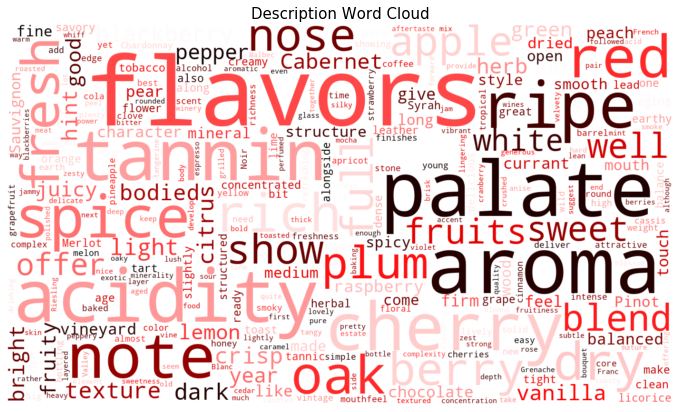

In [35]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
import random

# Changing wordcloud custom colour
def wine_color(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 100%%, %d%%)" % random.randint(0, 100)

# Defining stopwords
stopwords = set(stopwords.words('english', 'french'))
addStopWords = ['fruit', "Drink", "black", 'wine', 'drink','flavor','finish']

stopwords.update(addStopWords)

# Creating Wordcloud
wordcloud = WordCloud(
    background_color='white',
    collocations=False,
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1400, height=800,
    random_state=1,
).generate(" ".join(reviews['Description'].astype(str)))

print(wordcloud)

# Plotting WordCloud
fig = plt.figure(figsize = (14,7))

plt.imshow(wordcloud.recolor(color_func=wine_color, random_state=3),
           interpolation="bilinear")

plt.title("Description Word Cloud",fontsize=15)
plt.axis('off')
plt.savefig('WordCloud.jpeg', dpi=600)
plt.show()

### Turning all text in Description column into lowercase

In [37]:
reviews['Description']= reviews['Description'].str.lower()

### Removing all punctuations and numbers from Description column

In [38]:
import re
reviews['Description']= reviews['Description'].apply(lambda elem: re.sub('[^a-zA-Z]',' ', elem))  
reviews['Description'].head(5)

0    aromas include tropical fruit  broom  brimston...
1    this is ripe and fruity  a wine that is smooth...
2    tart and snappy  the flavors of lime flesh and...
3    pineapple rind  lemon pith and orange blossom ...
4    much like the regular bottling from       this...
Name: Description, dtype: object

### Creating a list of words for each review in Description column

In [39]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
word_list = reviews['Description'].apply(tokenizer.tokenize)
word_list.head(5)

0    [aromas, include, tropical, fruit, broom, brim...
1    [this, is, ripe, and, fruity, a, wine, that, i...
2    [tart, and, snappy, the, flavors, of, lime, fl...
3    [pineapple, rind, lemon, pith, and, orange, bl...
4    [much, like, the, regular, bottling, from, thi...
Name: Description, dtype: object

### Removing stopwords 

In [40]:
word_list = word_list.apply(lambda elem: [word for word in elem if not word in stopwords])
word_list

0         [aromas, include, tropical, broom, brimstone, ...
1         [ripe, fruity, smooth, still, structured, firm...
2         [tart, snappy, flavors, lime, flesh, rind, dom...
3         [pineapple, rind, lemon, pith, orange, blossom...
4         [much, like, regular, bottling, comes, across,...
                                ...                        
119983    [notes, honeysuckle, cantaloupe, sweeten, deli...
119984    [citation, given, much, decade, bottle, age, p...
119985    [well, drained, gravel, soil, gives, crisp, dr...
119986    [dry, style, pinot, gris, crisp, acidity, also...
119987    [big, rich, dry, powered, intense, spiciness, ...
Name: Description, Length: 119988, dtype: object

### Stemming

In [41]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
word_list = word_list.apply(lambda elem: [ps.stem(word) for word in elem])

### Adding a 'cleaned description' column to reviews dataframe

In [42]:
reviews['Clean Descriptions'] = word_list.apply(lambda elem: ' '.join(elem))

### Calculating total number of words, and vocabulary

In [43]:
total_words=[]
for i in range(len(word_list)):
    for word in word_list[i]:
        total_words.append(word) 
        
print('Total number of words in the reviews description: ', len(total_words))
print('Total number of unique words (vocabulary) in the reviews description: ', len(list(set(total_words))))

Total number of words in the reviews description:  2799541
Total number of unique words (vocabulary) in the reviews description:  21858


### Creating matrix of tokens (Bag of Words)
Once the matrix of tokens is created, a CountVectorizer function is used to count the number of words in each sentence and build a numerical matrix tokens.

In [44]:
# Converting "Clean Description" column to a matrix of token counts using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(analyzer='word', token_pattern=r'\w+', max_features=100)
vectorized = vect.fit_transform(reviews['Clean Descriptions']).toarray()
feature_names = vect.get_feature_names()
feature_names[0:10]

['acid',
 'age',
 'also',
 'appl',
 'aroma',
 'bake',
 'balanc',
 'berri',
 'bit',
 'blackberri']

In [45]:
vectorized=pd.DataFrame(vectorized)
vectorized.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Machine Learning
## KMeans Clustering

Clustering is the most widely used unsupervised learning technique. Kmeans clustering algorithm partitions the dataset into K distinct non-overlapping clusters. The clusters are determined by minimizing the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points for the cluster). 

In [48]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 15, n_init = 10, n_jobs = -1)
kmeans.fit(vectorized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Printing out the most frequent words for each cluster

In [49]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-9:-1]

for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(feature_names[word] for word in centroid))

0 : red, cherri, flavor, palat, tannin, acid, aroma, spice
1 : cabernet, sauvignon, blend, merlot, flavor, tannin, cherri, aroma
2 : tannin, age, fruit, ripe, rich, structur, acid, wood
3 : palat, tannin, aroma, cherri, spice, offer, berri, note
4 : flavor, aroma, palat, spice, feel, blackberri, note, herb
5 : palat, nose, flavor, show, note, fresh, dri, acid
6 : fresh, acid, flavor, crisp, light, fruiti, citru, bright
7 : aroma, note, oak, ripe, tannin, spice, sweet, rich
8 : cherri, flavor, tannin, acid, oak, raspberri, spice, dri
9 : dri, flavor, acid, tannin, note, rich, aroma, show
10 : acid, flavor, crisp, ripe, balanc, rich, fruiti, textur
11 : appl, palat, aroma, white, acid, flavor, note, pear
12 : full, bodi, flavor, ripe, rich, textur, aroma, tannin
13 : berri, flavor, aroma, plum, palat, herbal, feel, note
14 : flavor, ripe, sweet, rich, oak, tannin, spice, soft


### Creating a new column called clusters for each row in the dataset

In [50]:
reviews['Cluster'] = kmeans.labels_

### Filter wines varieties with over 5000 reviews

In [51]:
variety_df = reviews.groupby('Variety').filter(lambda x: len(x) > 5000) 
clusters = variety_df.groupby(['Cluster', 'Variety']).size()

### Plotting the number of wines in each cluster 

In [52]:
cls, var, count=[],[],[]
for j in range(0,15):
    for i in clusters[j].index:
        cls.append(j)
        var.append(i)
    for k in range(len(clusters[j].index)):
        count.append(clusters[j][k])

df=pd.DataFrame({'Cluster':cls, 'Variety':var, 'Count':count})

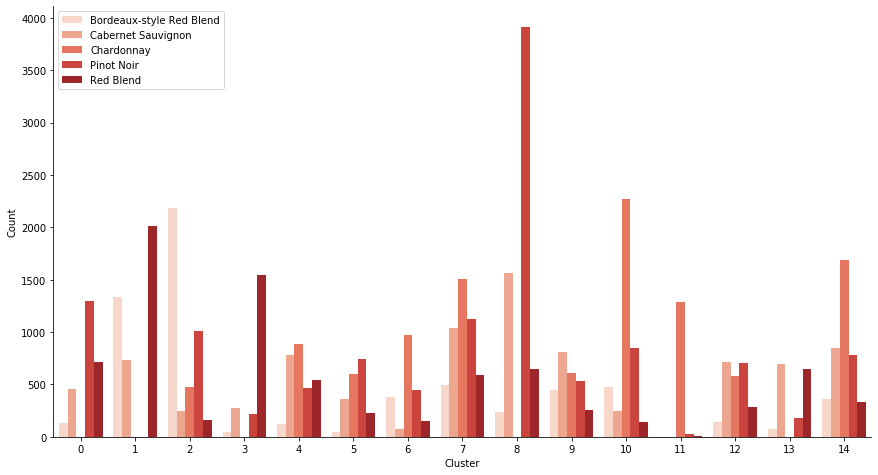

In [53]:
ax = sns.catplot(x="Cluster", y="Count", hue="Variety", data=df, kind="bar", palette="Reds", legend=False)
plt.legend(loc='upper left')
ax.fig.set_size_inches(14,7)
plt.show()

# Wine quality and price: 
### How much are you willing to pay for your wine? 

In this section, wines are categorized into four major groups based on wine quality: 

0) 80-85 points

1) 85-90 points

2) 90-95 points

3) 95-99 points

4) 99-100 points

In [54]:
def wine_quality(points):
    if points in list(range(80,85)):
        return 0
    elif points in list(range(85,90)):
        return 1
    elif points in list(range(90,95)):
        return 2
    elif points in list(range(95,99)):
        return 3
    else:
        return 4

reviews['Wine Quality'] = reviews['Points'].apply(wine_quality)

The barplot of wines in each quality category is depicted below for each cluster. This plot shows that wines with over 99 points are significantly more expensive compared to wines with points 95-99 at least for most clusters.

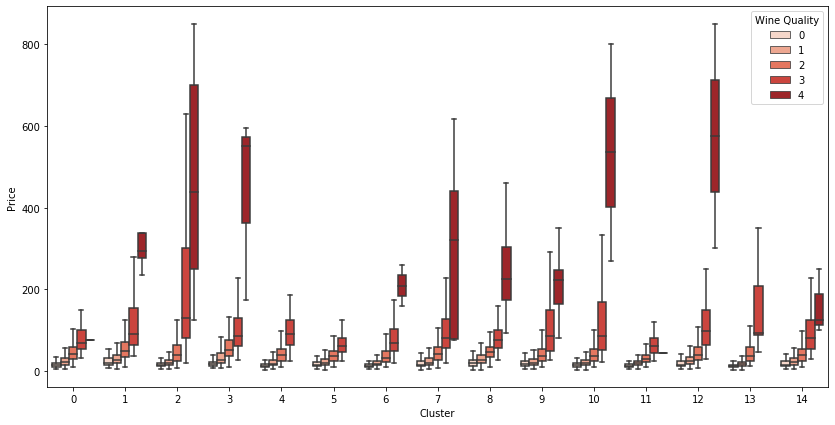

In [55]:
fig, ax = plt.subplots(figsize=(14, 7))
ax = sns.boxplot(x='Cluster', y='Price', data=reviews, palette="Reds", hue='Wine Quality', showfliers=False)

plt.show()

It is interesting to take a look at most expensive wines to speculate why they are overly priced relative to above average quality wines. For the sake of this exercise, wines with price of over $300 are considered as "most expensive".

Most expensive wines are filtered:

In [56]:
df_price= reviews['Price']>=300
expensive_wines = reviews[df_price]
expensive_wines.head(5)

,Country,Description,Designation,Points,Price,Province,Region_1,Region_2,Taster_Name,Taster_Twitter_Handle,Title,Variety,Winery,Log Price,Clean Descriptions,Wine Quality,Cluster
345,Australia,this wine contains some material over year...,Rare,100,350.0,Victoria,Rutherglen,NaN,Joe Czerwinski,@JoeCz,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat,Chambers Rosewood Vineyards,5.857933,contain materi year old show sign fragil inste...,4,9
346,Australia,this deep brown wine smells like a damp mossy...,Rare,98,350.0,Victoria,Rutherglen,NaN,Joe Czerwinski,@JoeCz,Chambers Rosewood Vineyards NV Rare Muscadelle...,Muscadelle,Chambers Rosewood Vineyards,5.857933,deep brown smell like damp mossi cave add comp...,3,7
347,Germany,dusty saffron spiced earthiness is juxtaposed...,Kiedrich Gräfenberg Trockenbeerenauslese,97,775.0,Rheingau,NaN,NaN,Anna Lee C. Iijima,NaN,Robert Weil 2014 Kiedrich Gräfenberg Trockenbe...,Riesling,Robert Weil,6.652863,dusti saffron spice earthi juxtapos intens man...,3,10
351,Hungary,this amber colored hungarian stunner has ether...,Eszencia,96,320.0,Tokaji,NaN,NaN,Jeff Jenssen,@worldwineguys,Oremus 2005 Eszencia (Tokaji),Furmint,Oremus,5.768321,amber color hungarian stunner ether aroma raw ...,3,11
353,France,this beautiful rich wine has yellow fruits an...,Le Montrachet,96,630.0,Burgundy,Montrachet,NaN,Roger Voss,@vossroger,Louis Latour 2014 Le Montrachet (Montrachet),Chardonnay,Louis Latour,6.445720,beauti rich yellow fruit concentr tightli text...,3,2


There are 345 wines with price tag of $300 or more.

In [57]:
print ('Number of most expensive wines:', expensive_wines.shape[0])

Number of most expensive wines: 345


Out of 345 "most expensive" wines, 196 wines are tested by only one person. That is slightly over 50%.

In [58]:
Taster = expensive_wines.Taster_Name.value_counts().head(10)
Taster

Roger Voss            196
Kerin O’Keefe          35
Joe Czerwinski         24
Anna Lee C. Iijima     23
Michael Schachner      20
Virginie Boone          7
Lauren Buzzeo           2
Matt Kettmann           2
Jeff Jenssen            1
Susan Kostrzewa         1
Name: Taster_Name, dtype: int64

# Conclusion

In this project I showed that there is a positive correlation between wine quality and price, with some wines being significantly over priced. Clusters 1,7,8,9,10,12,13 are priced pretty reasonable compared to their quality, whereas clusters 0,2,3,4,5,6,11, and 14 showed a spike in price for wines with over 99 points relative to wines with 95-99 points.
Further investigation showed that Mr. Roger Voss rated over 50% of the most expensive wines. Mr. Voss is a wine journalist, editor, and author based in Bordeaux, and has been writing about wines for the past 25 years (Reference: https://www.winemag.com/contributor/roger-voss/). 

